# Different visualizations and code for the benchmark plots

### Generate single image of file

In [56]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from PIL import Image
from tqdm import tqdm
from scipy.optimize import curve_fit

plotting all the edges:


100%|██████████| 163/163 [00:00<00:00, 3189.69it/s]

saving image ...
done! show image ...


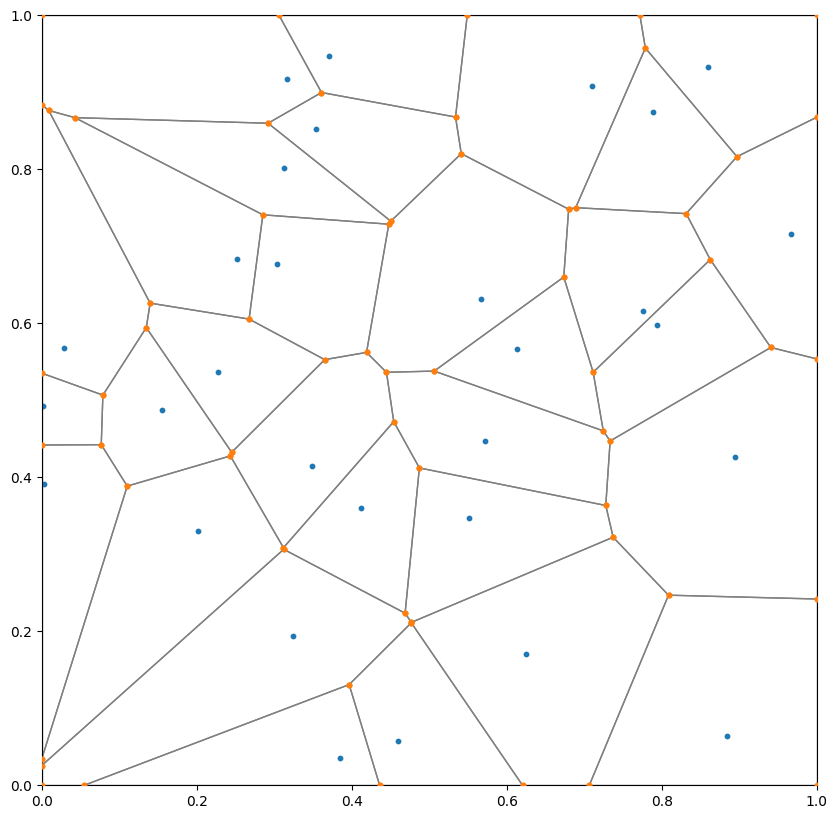

In [58]:
# load files for first snapshot
nr = 0
seeds = np.loadtxt('build/files/seed_list' + str(nr) +  '.csv', delimiter=',', skiprows=1)
verticies = np.loadtxt('build/files/vertex_list' + str(nr) +  '.csv', delimiter=',', skiprows=1)
edges = np.loadtxt('build/files/edge_list' + str(nr) +  '.csv', delimiter=',', skiprows=1)

# optional style settings
#plt.style.use('dark_background')
#plt.figure(figsize=(10,10), facecolor='black')
plt.figure(figsize=(10,10))


# function to plot an edge
def plot_edge(edge):
    plt.plot([edge[0], edge[2]], [edge[1], edge[3]], color = 'grey', zorder=1, linewidth = 1)


# plotting all the edges
print("plotting all the edges:")
progress_bar = tqdm(total=len(edges), position=0, leave=True)

for edge in edges:
    plot_edge(edge)
    progress_bar.update(1)

progress_bar.close()

# optional: scatter seeds and verticies
plt.scatter(seeds[:, 0], seeds[:, 1], s=10,  zorder = 2)
plt.scatter(verticies[:, 0], verticies[:, 1], s=10, zorder =3)

# set x and y limits
plt.xlim(0, 1)
plt.ylim(0, 1)

# save and show image
print("saving image ...")
plt.savefig("figures/single_picture.pdf")
print("done! show image ...")
plt.show()

### Generate moving mesh animation from files

create animation...


301it [00:29, 10.24it/s]                         

done


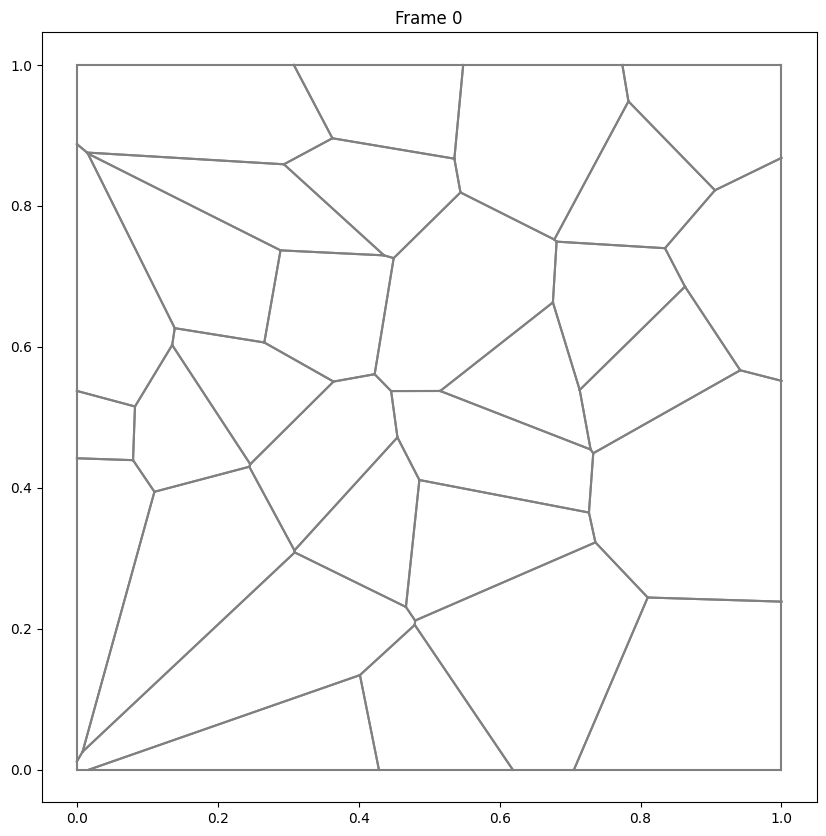

In [25]:
# function to plot an edge
def plot_edge(ax, edge):
    ax.plot([edge[0], edge[2]], [edge[1], edge[3]], color='grey', zorder=1)

# function to update the frame
def update(frame):

    # clear the frame
    plt.clf()
    
    # load data from the current file
    seeds = np.loadtxt(f'build/files/seed_list{frame}.csv', delimiter=',', skiprows=1)
    verticies = np.loadtxt(f'build/files/vertex_list{frame}.csv', delimiter=',', skiprows=1)
    edges = np.loadtxt(f'build/files/edge_list{frame}.csv', delimiter=',', skiprows=1)

    # plot edges
    for edge in edges:
        plot_edge(plt.gca(), edge)
    
    # optional : scatter seeds and verticies
    #plt.scatter(seeds[:, 0], seeds[:, 1], s=25, zorder=2)
    #plt.scatter(verticies[:, 0], verticies[:, 1], s=10, zorder=3)

    # title and stuff
    plt.title(f'Frame {frame}')
    plt.axis('equal')  # Keep the aspect ratio equal for better visualization
    progress_bar.update(1)
    #print(frame)


# Number of frames (assuming you have files numbered from 0 to num_frames)
num_frames = 300
frames_per_second = 30

# Create the animation
print('create animation...')
animation = FuncAnimation(plt.figure(figsize=(10, 10)), update, frames=num_frames, interval=200, repeat=False)

# Save the animation as a GIF using Pillow writer
animation_file = 'figures/voronoi_animation.gif'
progress_bar = tqdm(total=num_frames, position=0, leave=True)
animation.save(animation_file, writer='pillow', fps=frames_per_second)
progress_bar.close()
print('done')

### Generate Mesh generation animation from files

create animation...


100it [00:12,  7.77it/s]                       

done


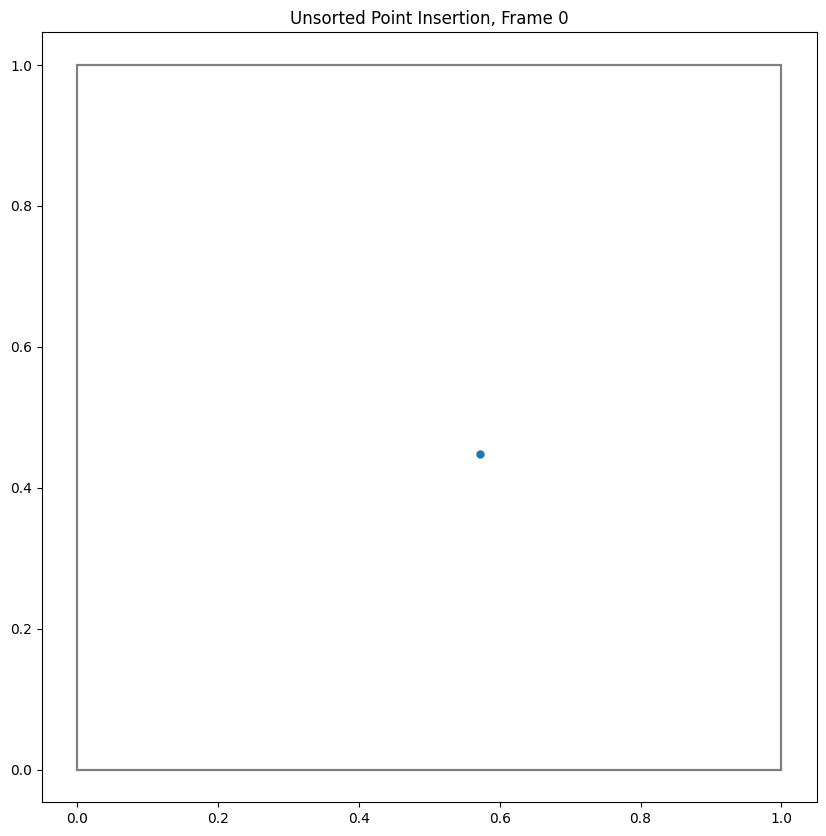

In [55]:
# function to plot an edge
def plot_edge(ax, edge):
    ax.plot([edge[0], edge[2]], [edge[1], edge[3]], color='grey', zorder=1)

# function to update the frame
def update(frame):

    # clear the frame
    plt.clf()
    plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color = 'grey', zorder =1)
    plt.xlim(0,1)
    plt.ylim(0,1)

    # load data from the current file
    seeds = np.loadtxt(f'build/files/seed_list{frame}.csv', delimiter=',', skiprows=1)
    verticies = np.loadtxt(f'build/files/vertex_list{frame}.csv', delimiter=',', skiprows=1)
    edges = np.loadtxt(f'build/files/edge_list{frame}.csv', delimiter=',', skiprows=1)

    #seeds_end = np.loadtxt(f'build/files/seed_list98.csv', delimiter=',', skiprows=1)
    #plt.scatter(seeds_end[:, 0], seeds_end[:, 1], s=25, zorder = 2)

    # plot edges
    for edge in edges:
        plot_edge(plt.gca(), edge)
    
    # optional : scatter seeds and verticies
    if frame == 0:
        plt.scatter(seeds[0], seeds[1], s = 25, zorder = 2)
    else:
        plt.scatter(seeds[:, 0], seeds[:, 1], s=25, zorder=2)
    #plt.scatter(verticies[:, 0], verticies[:, 1], s=10, zorder=3)


    # title and stuff
    plt.title(f'Unsorted Point Insertion, Frame {frame}')
    plt.axis('equal')  # Keep the aspect ratio equal for better visualization
    progress_bar.update(1)
    #print(frame)


# Number of frames (assuming you have files numbered from 0 to num_frames)
num_frames = 99
frames_per_second = 5

# Create the animation
print('create animation...')
animation = FuncAnimation(plt.figure(figsize=(10, 10)), update, frames=num_frames, interval=200, repeat=False)

# Save the animation as a GIF using Pillow writer
animation_file = 'figures/voronoi_animation.gif'
progress_bar = tqdm(total=num_frames, position=0, leave=True)
animation.save(animation_file, writer='pillow', fps=frames_per_second)
progress_bar.close()
print('done')

### performance benchmarking

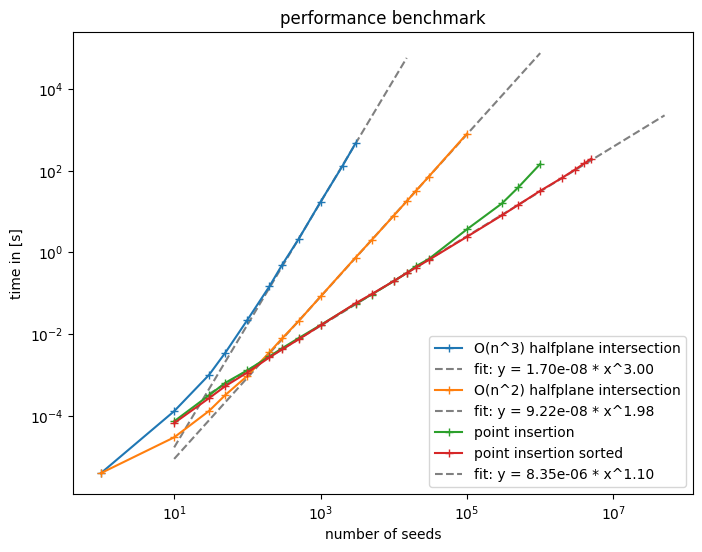

In [3]:
# load needed benchmark data
release_memory_opt = np.loadtxt('build/benchmarks/times_release_memory_opt.csv', delimiter=',', skiprows=1)
new_algorithm = np.loadtxt('build/benchmarks/time_hp_intersect_with_memory_log.csv', delimiter=',', skiprows=1)
pt_insertion = np.loadtxt('build/benchmarks/time_point_insertion_new_boundary_management.csv', delimiter=',', skiprows=1)
pt_insertion_sort = np.loadtxt('build/benchmarks/time_point_insertion_with_sort.csv', delimiter=',', skiprows=1)

# fitfunction
def line(x, m, b):
    return m*x + b

plt.figure(figsize=(8,6))

# fit for O(n^3) algorithm
popt, pcov = curve_fit(line, np.log(release_memory_opt[7:, 0]), np.log(release_memory_opt[7:,1]/1000000))
m = popt[0]
b = popt[1]
x_fit1= np.linspace(min(release_memory_opt[1:, 0]), max(release_memory_opt[:, 0])*5, 100)
y_fit1 = np.exp(line(np.log(x_fit1), m, b))


# fit for O(n^2) algorithm
popt1, pcov1 = curve_fit(line, np.log(new_algorithm[7:-1, 0]), np.log(new_algorithm[7:-1,1]/1000000))
m1 = popt1[0]
b1 = popt1[1]
x_fit2 = np.linspace(min(new_algorithm[1:, 0]), max(new_algorithm[:, 0])*10, 100)
y_fit2 = np.exp(line(np.log(x_fit2), m1, b1))

# fit for the sorted point insertion
popt2, pcov2 = curve_fit(line, np.log(pt_insertion_sort[4:-3, 0]), np.log(pt_insertion_sort[4:-3,1]/1000000))
m2 = popt2[0]
b2 = popt2[1]
x_fit3 = np.linspace(min(pt_insertion_sort[1:, 0]), max(pt_insertion_sort[:, 0])*10, 100)
y_fit3 = np.exp(line(np.log(x_fit3), m2, b2))

# plot results
plt.title('performance benchmark')
plt.xlabel('number of seeds')
plt.ylabel('time in [s]')
plt.yscale('log')
plt.xscale('log')
plt.plot(release_memory_opt[:, 0], release_memory_opt[:, 1]/1000000, label = 'O(n^3) halfplane intersection', marker = '+', zorder = 2)
plt.plot(x_fit1, y_fit1, label=f'fit: y = {np.exp(b):.2e} * x^{m:.2f}', color='grey', linestyle = '--', zorder = 1)
plt.plot(new_algorithm[:, 0], new_algorithm[:, 1]/1000000, label = 'O(n^2) halfplane intersection', marker = '+', zorder = 2)
plt.plot(x_fit2, y_fit2, label=f'fit: y = {np.exp(b1):.2e} * x^{m1:.2f}', color='grey', linestyle = '--', zorder = 1)
plt.plot(pt_insertion[:, 0], pt_insertion[:, 1]/1000000, label = 'point insertion', marker = '+', zorder = 2)
plt.plot(pt_insertion_sort[:, 0], pt_insertion_sort[:, 1]/1000000, label = 'point insertion sorted', marker = '+', zorder = 2)
plt.plot(x_fit3, y_fit3, label=f'fit: y = {np.exp(b2):.2e} * x^{m2:.2f}', color='grey', linestyle = '--', zorder = 1)
plt.legend()
plt.savefig("figures/benchmark.png")
plt.show()


### memory benchmarking

8.41662335083572  KB per Seed


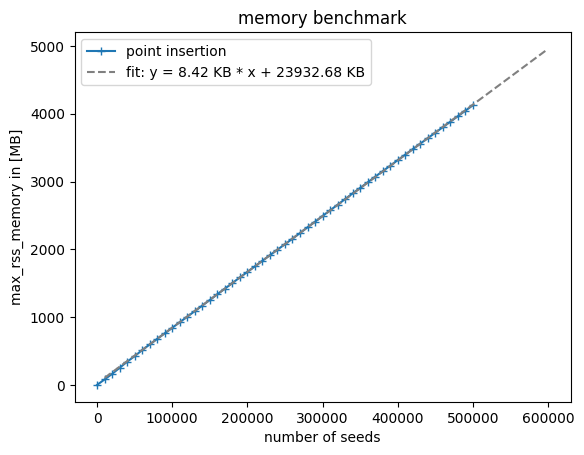

In [59]:
# load data
pt_insertion_memory = np.loadtxt('build/benchmarks/memory_for_memory_benchmark.csv', delimiter=',', skiprows=1)

# fit linear function 
popt1, pcov1 = curve_fit(line, pt_insertion_memory[9:, 0], pt_insertion_memory[9:,1]/1024/1024)
print((popt1[0]*1024), ' KB per Seed')
m1 = popt1[0]
b1 = popt1[1]

# plot the linear fit
x_fit = np.linspace(min(pt_insertion_memory[1:, 0]), max(pt_insertion_memory[:, 0])*1.2, 100)
y_fit = line(x_fit, m1, b1)
plt.title('memory benchmark')
plt.xlabel('number of seeds')
plt.ylabel('max_rss_memory in [MB]')
plt.plot(pt_insertion_memory[:, 0], pt_insertion_memory[:, 1]/1024/1024, label = 'point insertion', marker = '+')
plt.plot(x_fit, y_fit, label=f'fit: y = {m1*1024:.2f} KB * x + {b1*1024:.2f} KB', color='grey', linestyle = '--')
plt.legend(loc = 'best')
plt.savefig("figures/memory_benchmark.png")
plt.show()